# **1. Perkenalan Dataset**


1. **Sumber Dataset**:
Dataset ini diperoleh dari Kanggle. Dengan tautan [Data Penjualan Toko Buku](https://https://www.kaggle.com/datasets/carolineleonor/data-penjualan-toko-buku).
2. **Informasi Dataset**:
   - Dataset ini berisi berbagai informasi dari penjualan toko alat tulis dan buku dan dalam format (.CSV).
   - Didalamnya terdapat:
      - id transaksi
      - jenis barang
      - jumlah/banyaknya
      - tanggal pembelian
      - nama pembeli
      - dan yang terakhir total pembayaran.
   - Terdapat 3241 baris dan 6 kolom

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.


In [3]:
data = pd.read_csv('Dataset_inisiasi.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

Detail dari isi semua data:

In [4]:
print("Menampilkan beberapa data:")
print(data)

Menampilkan beberapa data:
      id_transaksi       jenis_item  jumlah tanggal pembelian nama_customer  \
0         133889.0       Alat Tulis       1          1/1/2010  Stacy Campos   
1         133889.0     Buku Sejarah       1          1/1/2010  Stacy Campos   
2         133889.0   Buku Anak-Anak       2          1/1/2010  Stacy Campos   
3         133889.0  Majalah Fashion       1          1/1/2010  Stacy Campos   
4         133889.0   Majalah Berita       2          1/1/2010  Stacy Campos   
...            ...              ...     ...               ...           ...   
3235           NaN              NaN       2         4/30/2024           NaN   
3236           NaN              NaN       6         4/30/2024           NaN   
3237           NaN              NaN       1         4/30/2024           NaN   
3238           NaN              NaN       9         4/30/2024           NaN   
3239           NaN              NaN       1         4/30/2024           NaN   

          total  
0     

Jumlah baris dan kolom dalam Dataset:

In [5]:
print("\nNumber of rows and columns:")
print(data.shape)


Number of rows and columns:
(3240, 6)


Jenis data di setiap kolom (numerikal/kategorikal):

In [6]:
print("\nData types in each column:")
print(data.dtypes)

numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("\nKolom numerikal:")
print(numerical_columns)

print("\nKolom kategorikal:")
print(categorical_columns)


Data types in each column:
id_transaksi         float64
jenis_item            object
jumlah                 int64
tanggal pembelian     object
nama_customer         object
total                float64
dtype: object

Kolom numerikal:
['id_transaksi', 'jumlah', 'total']

Kolom kategorikal:
['jenis_item', 'tanggal pembelian', 'nama_customer']


2. **Menangani Data yang hilang**

- Identifikasi data yang hilang:

In [7]:
print("Data yang hilang di setiap kolom:")
print(data.isnull().sum())

Data yang hilang di setiap kolom:
id_transaksi         771
jenis_item           771
jumlah                 0
tanggal pembelian      3
nama_customer        771
total                  2
dtype: int64


- Analisis presentase data yang hilang di setiap kolom:

In [8]:
missing_percentage = data.isnull().mean() * 100
print("\nPersentase data yang hilang di setiap kolom:")
print(missing_percentage)


Persentase data yang hilang di setiap kolom:
id_transaksi         23.796296
jenis_item           23.796296
jumlah                0.000000
tanggal pembelian     0.092593
nama_customer        23.796296
total                 0.061728
dtype: float64


2. **Menangani Data yang Hilang**
- Mengubah kolom total dan membagi nya 10 agar menghilangkan 1 digit 0 supaya harga yang jauh lebih realistis

In [9]:
def ubah_format(angka):
    if angka is not None:
        return float(angka.replace(',', '')) / 10
    return angka

data['total'] = data['total'].astype(str).apply(ubah_format)

- Menghapus baris yang memiliki data yang hilang

In [10]:
data_cleaned = data.dropna()

print("\nData setelah menghapus baris yang memiliki data yang hilang:")
print(data_cleaned)


Data setelah menghapus baris yang memiliki data yang hilang:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0         133889.0       Alat Tulis       1          1/1/2010   Stacy Campos   
1         133889.0     Buku Sejarah       1          1/1/2010   Stacy Campos   
2         133889.0   Buku Anak-Anak       2          1/1/2010   Stacy Campos   
3         133889.0  Majalah Fashion       1          1/1/2010   Stacy Campos   
4         133889.0   Majalah Berita       2          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464      134294.0       Alat Tulis       3         4/30/2024  Richard Jones   
2465      134294.0     Buku Sejarah       4         4/30/2024  Richard Jones   
2466      134294.0   Buku Anak-Anak       2         4/30/2024  Richard Jones   
2467      134294.0  Majalah Fashion       9         4/30/2024  Richard Jones   
2468      134294.0   Majalah Berita       4         4/30/2

3. **Analisis Distribusi dan Korelasi**

- Statistik deskriptif untuk variabel numerik:

In [11]:
print("\nStatistik deskriptif untuk variabel numerik:")
pd.options.display.float_format = '{:.2f}'.format
print(data_cleaned.describe())


Statistik deskriptif untuk variabel numerik:
       id_transaksi  jumlah      total
count       2464.00 2464.00    2464.00
mean      134091.91    4.97  229652.80
std          116.39    2.60  278653.09
min       133889.00    1.00    2000.00
25%       133992.00    3.00   22500.00
50%       134091.00    5.00  117000.00
75%       134192.00    7.00  325000.00
max       134294.00    9.00 1215000.00


- Visualisasi histogram untuk setiap variabel numerik

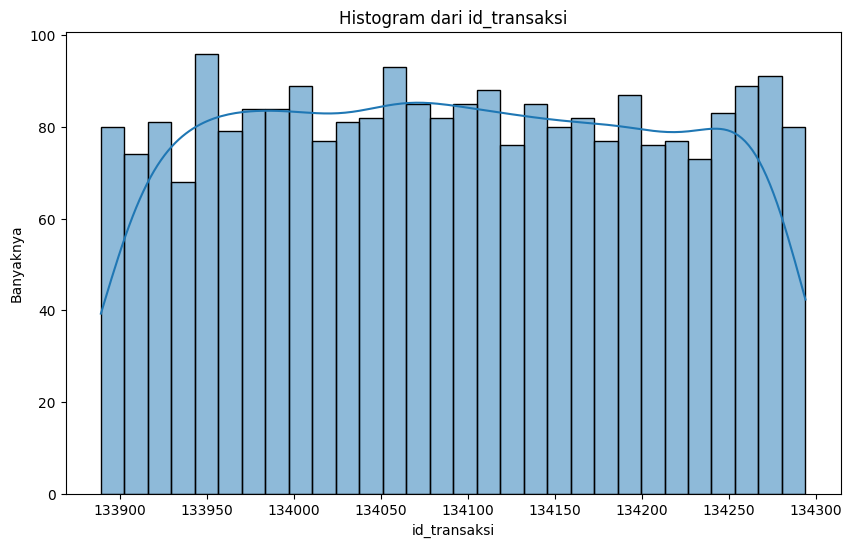

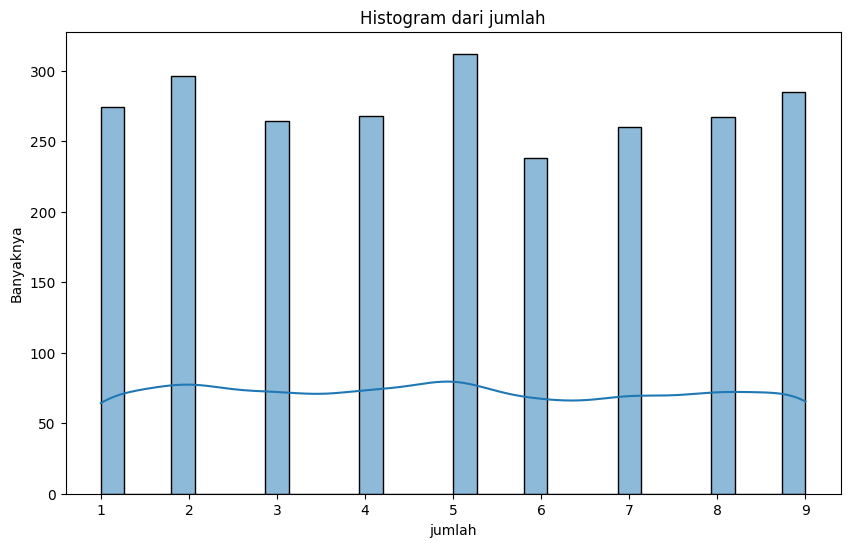

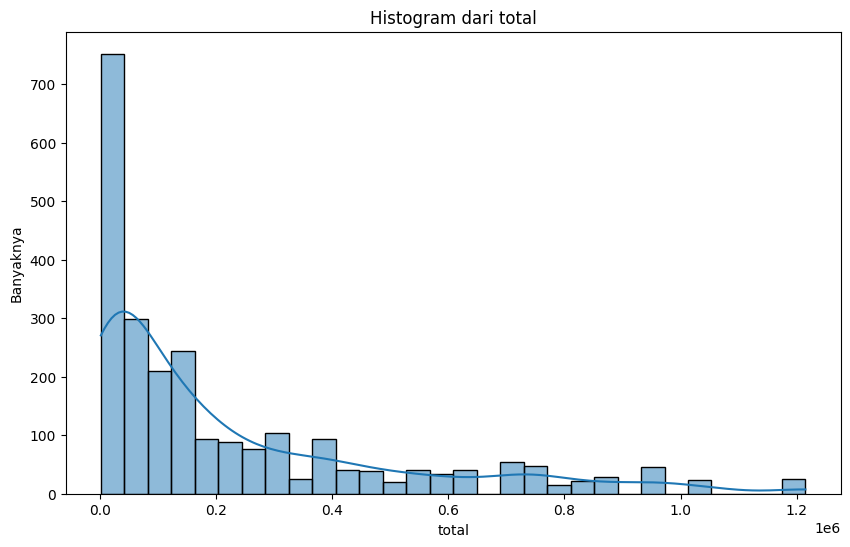

In [12]:
for column in data_cleaned.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[column], kde=True, bins=30)
    plt.title(f'Histogram dari {column}')
    plt.xlabel(column)
    plt.ylabel('Banyaknya')
    plt.show()

- hubungan antara variabel menggunakan matriks korelasi

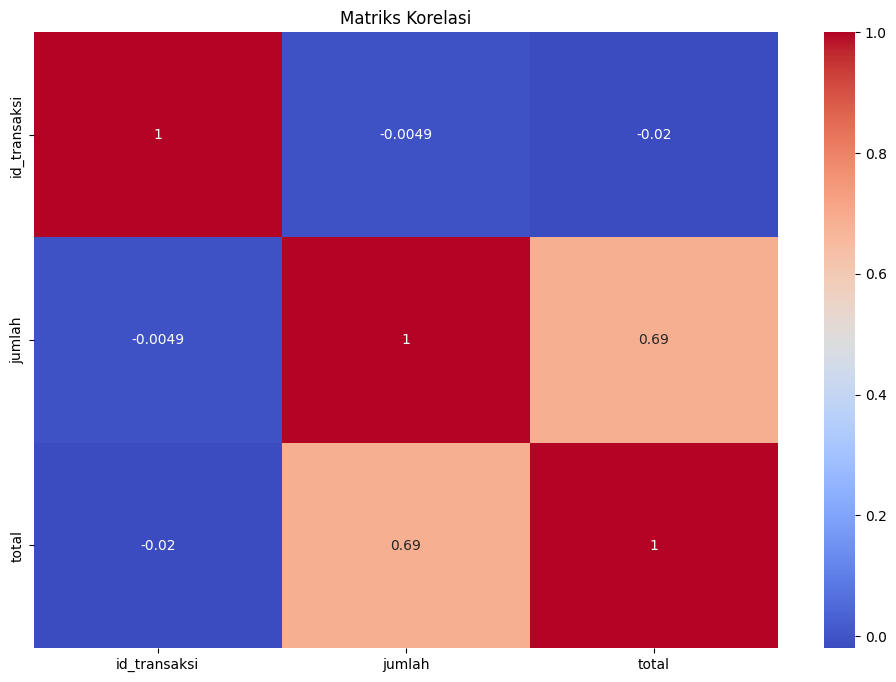

In [13]:
numeric_data = data_cleaned.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

- hubungan antara variabel menggunakan matriks scatter plot

<Figure size 1000x800 with 0 Axes>

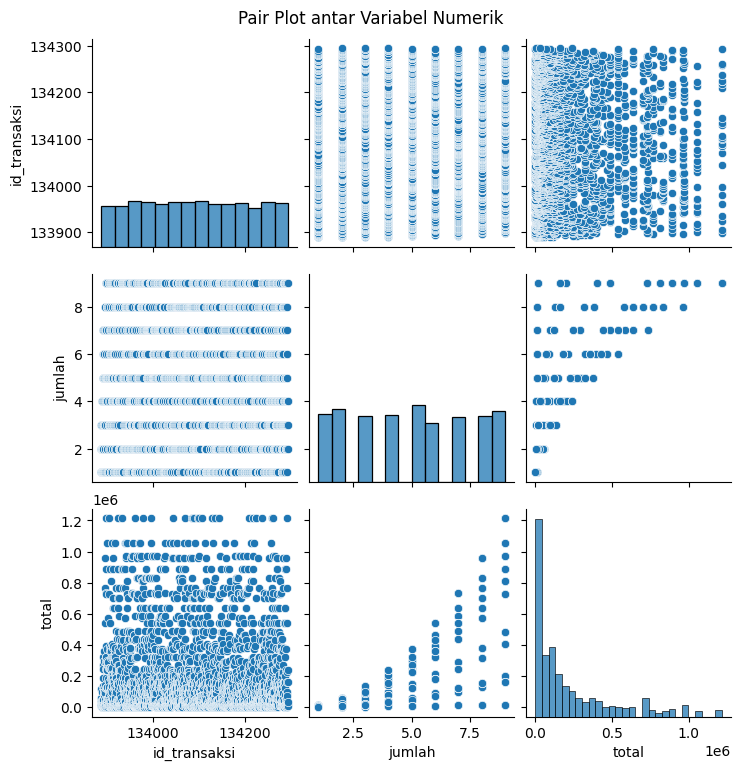

In [14]:
numeric_data = data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot antar Variabel Numerik', y=1.02)
plt.show()

3. **Visualisasi Data**

- Statistik visualisasi item yang dibeli:

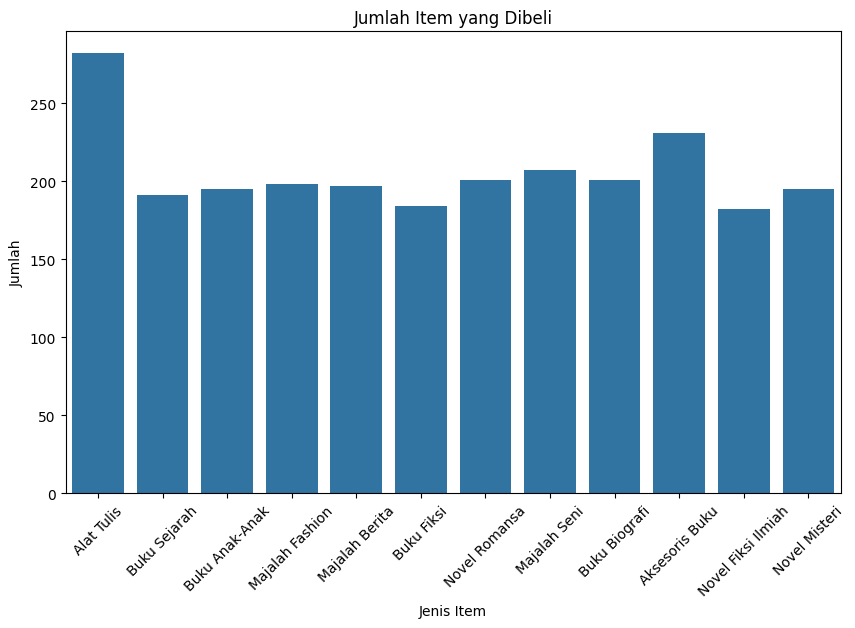

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='jenis_item')
plt.title('Jumlah Item yang Dibeli')
plt.xlabel('Jenis Item')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

- Statistik visualisasi dari tanggal pembelian dengan menampilkan jumlah pembelian per bulan

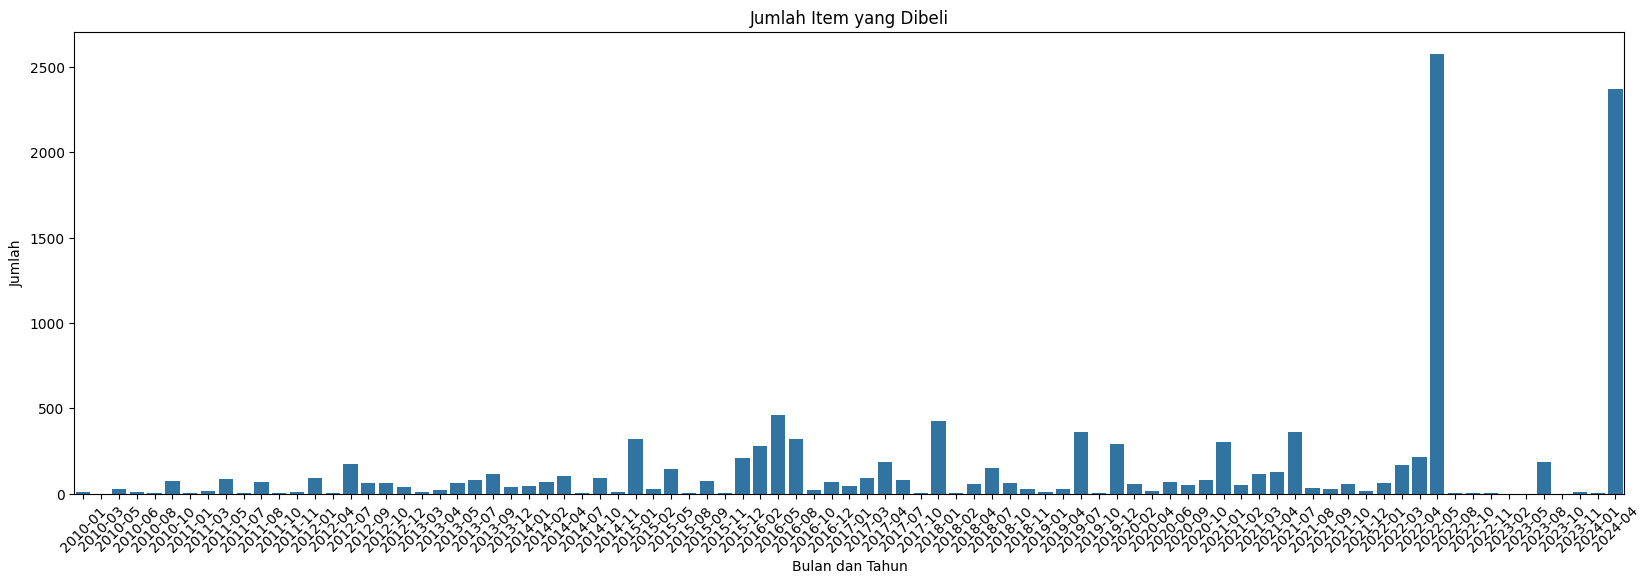

In [16]:
bulan_tahun = pd.to_datetime(data_cleaned['tanggal pembelian']).dt.to_period('M')
jumlah_item_per_bulan_tahun = data_cleaned.groupby(bulan_tahun)['jumlah'].sum()

plt.figure(figsize=(20, 6))
sns.barplot(x=jumlah_item_per_bulan_tahun.index.astype(str), y=jumlah_item_per_bulan_tahun.values)
plt.title('Jumlah Item yang Dibeli')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

- Statistik visualisasi dari nama customer yang diambil berdasarkan top 20 pembelian

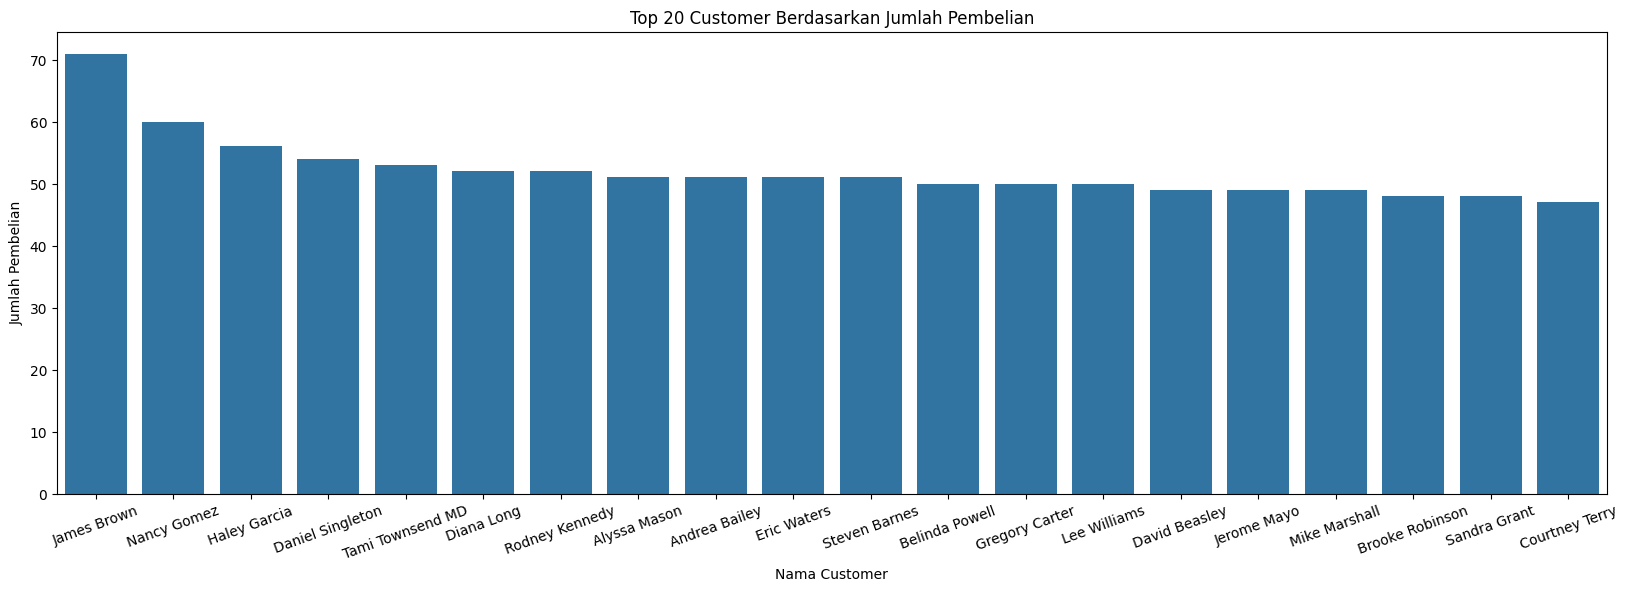

In [17]:
top_customers = data_cleaned.groupby('nama_customer')['jumlah'].sum().nlargest(20).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=top_customers, x='nama_customer', y='jumlah')
plt.title('Top 20 Customer Berdasarkan Jumlah Pembelian')
plt.xlabel('Nama Customer')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=20)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [18]:
print(data_cleaned)

      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis       1          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah       1          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak       2          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion       1          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita       2          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis       3         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah       4         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak       2         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion       9         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita       4         4/30/2024  Richard Jones   

         total  
0     12000.00  
1    

### Menghapus Data Duplikat

In [19]:
data_cleaned = data_cleaned.drop_duplicates()

print(data_cleaned)

      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis       1          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah       1          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak       2          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion       1          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita       2          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis       3         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah       4         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak       2         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion       9         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita       4         4/30/2024  Richard Jones   

         total  
0     12000.00  
1    

### Normalisasi atau Standarisasi Fitur
- Normalisasi: Mengubah data ke rentang [0,1]

In [20]:
scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()
data_normalized[['jumlah', 'total']] = scaler.fit_transform(data_normalized[['jumlah', 'total']])
data_normalized = data_normalized.round(3)
print("Data Setelah Normalisasi:")
print(data_normalized)

Data Setelah Normalisasi:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis    0.00          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah    0.00          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak    0.12          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion    0.00          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita    0.12          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis    0.25         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah    0.38         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak    0.12         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion    1.00         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita    0.38         4/30/2024  Richard Jones   

      total  

- Standarisasi: Mengubah data sehingga memiliki distribusi dengan nilai rata-rata (mean) 0 dan standar deviasi 1

In [21]:
scaler = StandardScaler()
data_standardized = data_cleaned.copy()
data_standardized[['jumlah', 'total']] = scaler.fit_transform(data_standardized[['jumlah', 'total']])
data_standardized = data_standardized.round(3)
print("Data Setelah Standarisasi:")
print(data_standardized)

Data Setelah Standarisasi:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis   -1.53          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah   -1.53          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak   -1.14          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion   -1.53          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita   -1.14          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis   -0.76         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah   -0.37         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak   -1.14         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion    1.55         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita   -0.37         4/30/2024  Richard Jones   

      total 

### Deteksi dan Penanganan Outlier
- IQR (Interquartile Range): Metode yang menggunakan quartile untuk mendeteksi outlier.

In [22]:
Q1 = data_cleaned[['jumlah', 'total']].quantile(0.25)
Q3 = data_cleaned[['jumlah', 'total']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_cleaned[((data_cleaned[['jumlah', 'total']] < lower_bound) | (data_cleaned[['jumlah', 'total']] > upper_bound)).any(axis=1)]
print("Outlier:")
print(outliers)

Outlier:
      id_transaksi          jenis_item  jumlah tanggal pembelian  \
50       133897.00      Majalah Berita       8         5/17/2011   
57       133899.00        Buku Sejarah       9         5/17/2011   
58       133899.00     Majalah Fashion       9         5/17/2011   
69       133900.00      Majalah Berita       9         8/28/2011   
89       133905.00          Alat Tulis       9         1/25/2012   
...            ...                 ...     ...               ...   
2400     134283.00       Novel Misteri       8         4/30/2024   
2434     134288.00        Majalah Seni       9         4/30/2024   
2444     134290.00        Buku Sejarah       8         4/30/2024   
2446     134290.00      Buku Anak-Anak       9         4/30/2024   
2461     134293.00  Novel Fiksi Ilmiah       9         4/30/2024   

             nama_customer      total  
50            Tim Mcdowell  960000.00  
57        Tami Townsend MD 1215000.00  
58        Tami Townsend MD  891000.00  
69      Dalton

- Penanganan Outlier
    - Penyesuaian/penanganan outlier: Nilai-nilai yang berada di luar batas tertentu (outlier) disesuaikan atau diganti dengan nilai batas yang ditentukan

In [23]:
data_cleaned_outlier = data_cleaned.copy()
for column in ['jumlah', 'total']:
    data_cleaned_outlier[column] = np.where(data_cleaned[column] < lower_bound[column], lower_bound[column], data_cleaned[column])
    data_cleaned_outlier[column] = np.where(data_cleaned[column] > upper_bound[column], upper_bound[column], data_cleaned[column])

print("Data dengan Outlier yang Disesuaikan:")
print(data_cleaned_outlier)

Data dengan Outlier yang Disesuaikan:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis    1.00          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah    1.00          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak    2.00          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion    1.00          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita    2.00          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis    3.00         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah    4.00         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak    2.00         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion    9.00         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita    4.00         4/30/2024  Richard Jones   

 

### Encoding Data Kategorikal
- Label Encoding untuk kategori jenis item

In [24]:
label_encoder = LabelEncoder()

data_cleaned.loc[:, 'jenis_item_encoded'] = label_encoder.fit_transform(data_cleaned['jenis_item'])

print("Data Setelah Label Encoding:")
print(data_cleaned[['jenis_item', 'jenis_item_encoded']])

encoded_items = pd.DataFrame({
    'jenis_item': label_encoder.classes_,
    'jenis_item_encoded': range(len(label_encoder.classes_))
})

print("Nama Item dan Nilai Encode:")
print(encoded_items)

Data Setelah Label Encoding:
           jenis_item  jenis_item_encoded
0          Alat Tulis                   1
1        Buku Sejarah                   5
2      Buku Anak-Anak                   2
3     Majalah Fashion                   7
4      Majalah Berita                   6
...               ...                 ...
2464       Alat Tulis                   1
2465     Buku Sejarah                   5
2466   Buku Anak-Anak                   2
2467  Majalah Fashion                   7
2468   Majalah Berita                   6

[2464 rows x 2 columns]
Nama Item dan Nilai Encode:
            jenis_item  jenis_item_encoded
0       Aksesoris Buku                   0
1           Alat Tulis                   1
2       Buku Anak-Anak                   2
3        Buku Biografi                   3
4           Buku Fiksi                   4
5         Buku Sejarah                   5
6       Majalah Berita                   6
7      Majalah Fashion                   7
8         Majalah Seni     

### Binning (Pengelompokan Data)
- Equal-Width Binning

In [25]:
total_bins_equal_width = pd.cut(data_cleaned['total'], bins=4)

print("Hasil Equal-Width Binning:")
print(total_bins_equal_width)

Hasil Equal-Width Binning:
0       (787.0, 305250.0]
1       (787.0, 305250.0]
2       (787.0, 305250.0]
3       (787.0, 305250.0]
4       (787.0, 305250.0]
              ...        
2464    (787.0, 305250.0]
2465    (787.0, 305250.0]
2466    (787.0, 305250.0]
2467    (787.0, 305250.0]
2468    (787.0, 305250.0]
Name: total, Length: 2464, dtype: category
Categories (4, interval[float64, right]): [(787.0, 305250.0] < (305250.0, 608500.0] < (608500.0, 911750.0] < (911750.0, 1215000.0]]


- Equal-Frequency Binning

Hasil Equal-Frequency Binning:
0        (1999.999, 22500.0]
1        (1999.999, 22500.0]
2        (22500.0, 117000.0]
3        (1999.999, 22500.0]
4        (22500.0, 117000.0]
                ...         
2464     (1999.999, 22500.0]
2465    (117000.0, 325000.0]
2466     (1999.999, 22500.0]
2467    (117000.0, 325000.0]
2468     (22500.0, 117000.0]
Name: total, Length: 2464, dtype: category
Categories (4, interval[float64, right]): [(1999.999, 22500.0] < (22500.0, 117000.0] < (117000.0, 325000.0] < (325000.0, 1215000.0]]


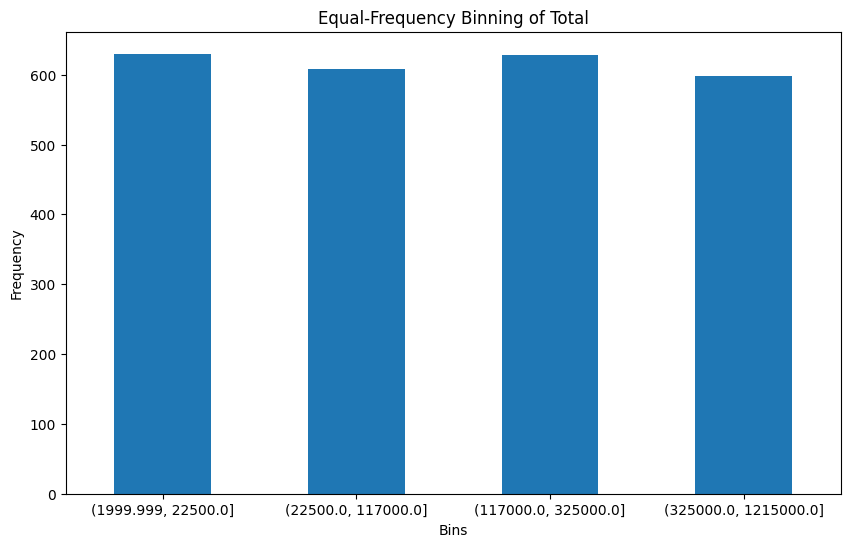

In [26]:
total_bins_equal_freq = pd.qcut(data_cleaned['total'], q=4)

print("Hasil Equal-Frequency Binning:")
print(total_bins_equal_freq)

plt.figure(figsize=(10, 6))
total_bins_equal_freq.value_counts().sort_index().plot(kind='bar')
plt.title('Equal-Frequency Binning of Total')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

- Distribusi total pembelian

0             Low
1             Low
2             Low
3             Low
4          Medium
          ...    
2464          Low
2465    Very High
2466     Very Low
2467         High
2468          Low
Name: total, Length: 2464, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']


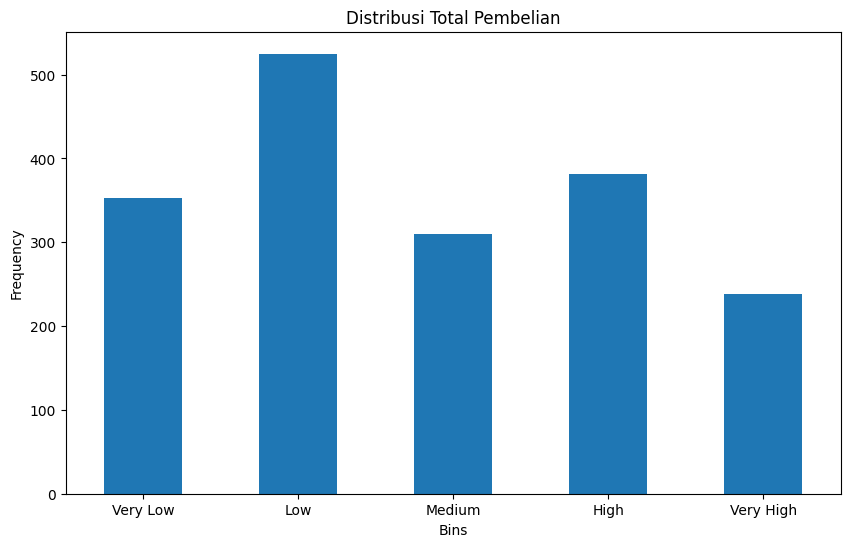

In [27]:
bins_binn = [0, 10000, 50000, 100000, 200000, 300000]
labels_binn = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

total_bins_custom = pd.cut(data_cleaned['total'], bins=bins_binn, labels=labels_binn)

print(total_bins_custom)

plt.figure(figsize=(10, 6))
total_bins_custom.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Distribusi Total Pembelian')
plt.xticks(rotation=0)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
    - menggunakan kolom total dan jumlah, kita dapat mengelompokkan data berdasarkan total nilai transaksi dan jumlah item yang dibeli
2. Latih model dengan data menggunakan algoritma tersebut.
    - Latih model K-Means dengan fitur total, jumlah, dan jenis_item_encoded yang telah di-encode, kemudian tambahkan label kluster hasilnya ke dalam DataFrame untuk analisis lebih lanjut

In [28]:
data_cleaned_outlier = data_cleaned_outlier.copy()
data_cleaned_outlier.loc[:, 'jenis_item_encoded'] = label_encoder.fit_transform(data_cleaned_outlier['jenis_item'])

features = data_cleaned_outlier[['total', 'jumlah', 'jenis_item_encoded']]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

data_cleaned_outlier.loc[:, 'cluster'] = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.

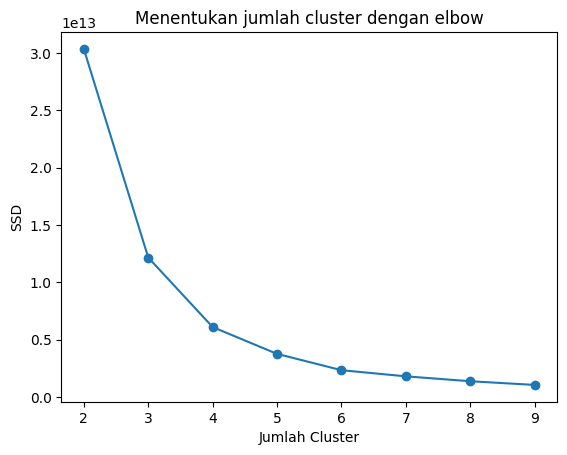

In [29]:
ssd = []
range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters, ssd, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSD')
plt.title('Menentukan jumlah cluster dengan elbow')
plt.show()

2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

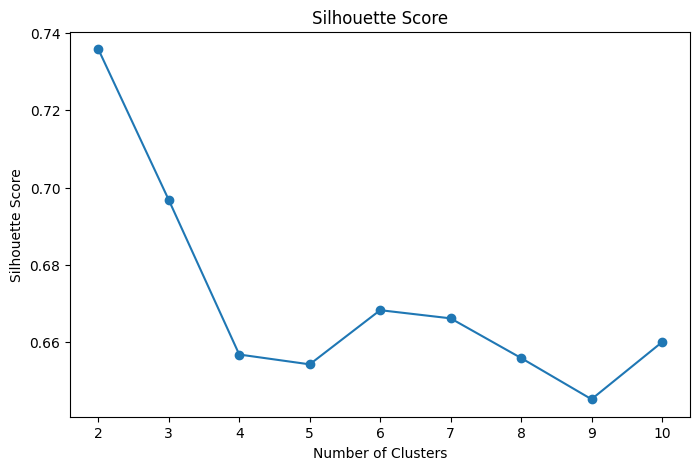

In [30]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection menggunakan SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Pilih jumlah fitur yang diinginkan
selected_features = selector.fit_transform(features, data_cleaned_outlier['cluster'])

# Pemodelan dan evaluasi kembali
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(selected_features)
new_clusters = kmeans.labels_

# Evaluasi performa model
original_silhouette = silhouette_score(features, data_cleaned_outlier['cluster'])
new_silhouette = silhouette_score(selected_features, new_clusters)

print(f'Silhouette Score Sebelum Feature Selection: {original_silhouette:.2f}')
print(f'Silhouette Score Setelah Feature Selection: {new_silhouette:.2f}')

Silhouette Score Sebelum Feature Selection: 0.66
Silhouette Score Setelah Feature Selection: 0.70


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

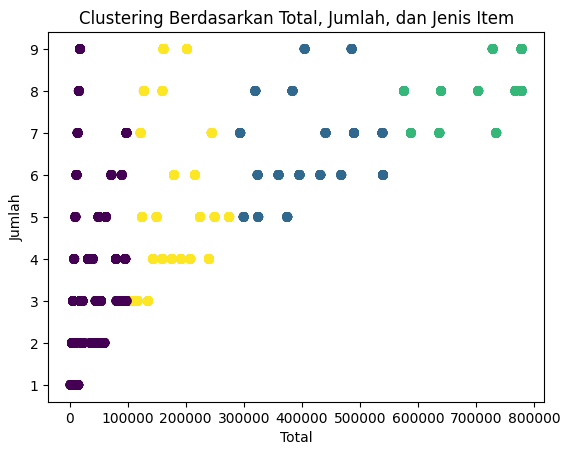

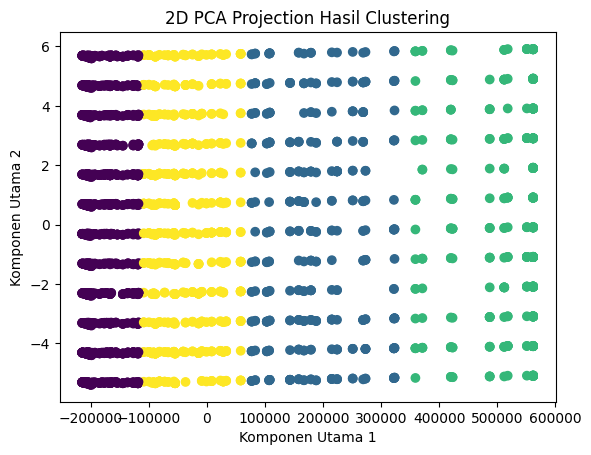

In [32]:
# Scatter plot hasil clustering
plt.scatter(data_cleaned_outlier['total'], data_cleaned_outlier['jumlah'], c=data_cleaned_outlier['cluster'], cmap='viridis')
plt.xlabel('Total')
plt.ylabel('Jumlah')
plt.title('Clustering Berdasarkan Total, Jumlah, dan Jenis Item')
plt.show()

# PCA projection untuk visualisasi 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data_cleaned_outlier['cluster'], cmap='viridis')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('2D PCA Projection Hasil Clustering')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [33]:
df_normalized = data_normalized.copy()
df_original = data_cleaned.copy()
df_normalized['Cluster'] = kmeans.labels_

label_encoder = LabelEncoder()
df_normalized['jenis_item_encoded'] = label_encoder.fit_transform(df_normalized['jenis_item'])

df_normalized['jenis_item'] = label_encoder.inverse_transform(df_normalized['jenis_item_encoded'])

df_original['jenis_item'] = df_normalized['jenis_item']
print(df_original)

      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis       1          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah       1          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak       2          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion       1          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita       2          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis       3         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah       4         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak       2         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion       9         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita       4         4/30/2024  Richard Jones   

         total  jenis_item_encoded  
0 

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

- Inverse Data untuk data yang telah di normalisasi

In [34]:
df_normalized = data_normalized.copy()
df_normalized[['jumlah', 'total']] = scaler.inverse_transform(df_normalized[['jumlah', 'total']])

# Menampilkan data setelah inverse transform
print("Data Setelah Inverse Transform:")
print(df_normalized)

Data Setelah Inverse Transform:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis    4.97          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah    4.97          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak    5.29          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion    4.97          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita    5.29          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis    5.62         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah    5.94         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak    5.29         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion    7.56         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita    5.94         4/30/2024  Richard Jones   

       

- Inverse Data untuk data yang telah di normalisasi

In [35]:
df_standarized = data_standardized.copy()
df_standarized[['jumlah', 'total']] = scaler.inverse_transform(df_standarized[['jumlah', 'total']])

print("Data Setelah Inverse Transform:")
print(df_standarized)

Data Setelah Inverse Transform:
      id_transaksi       jenis_item  jumlah tanggal pembelian  nama_customer  \
0        133889.00       Alat Tulis    1.00          1/1/2010   Stacy Campos   
1        133889.00     Buku Sejarah    1.00          1/1/2010   Stacy Campos   
2        133889.00   Buku Anak-Anak    2.00          1/1/2010   Stacy Campos   
3        133889.00  Majalah Fashion    1.00          1/1/2010   Stacy Campos   
4        133889.00   Majalah Berita    2.00          1/1/2010   Stacy Campos   
...            ...              ...     ...               ...            ...   
2464     134294.00       Alat Tulis    3.00         4/30/2024  Richard Jones   
2465     134294.00     Buku Sejarah    4.00         4/30/2024  Richard Jones   
2466     134294.00   Buku Anak-Anak    2.00         4/30/2024  Richard Jones   
2467     134294.00  Majalah Fashion    9.00         4/30/2024  Richard Jones   
2468     134294.00   Majalah Berita    4.00         4/30/2024  Richard Jones   

       

### Menghitung rata-rata dan median untuk setiap cluster

In [36]:
cluster_stats = data_cleaned_outlier.groupby('cluster').agg({
    'total': ['mean', 'median'],
    'jumlah': ['mean', 'median'],
    'jenis_item_encoded': lambda x: x.value_counts().idxmax()
})

print(cluster_stats)

            total           jumlah        jenis_item_encoded
             mean    median   mean median           <lambda>
cluster                                                     
0        34406.14  20000.00   3.18   3.00                  1
1       401722.53 396000.00   6.64   6.00                  0
2       728659.02 768000.00   8.25   8.00                  1
3       176125.44 162000.00   5.68   5.00                  1


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
1. **Rata-rata Total Pembelian: 34,406.14**
2. **Rata-rata Jumlah Item Pembelian: 3.18**
3. **Jenis Item Pembelian Paling Umum: Alat Tulis**
- **Analisis:** Cluster ini mencakup pelanggan dengan total pembelian rendah hingga menengah dan jumlah item yang relatif sedikit. Pelanggan dalam cluster ini cenderung memiliki daya beli yang lebih rendah dan mereka lebih cenderung untuk membelanjakan sebagian kecil pendapatan mereka pada jenis item tertentu.
## Cluster 1:
1. **Rata-rata Total Pembelian: 401,722.53**
2. **Rata-rata Jumlah: 6.64**
3. **Jenis Item Pembelian Paling Umum: Aksesoris Buku**
- **Analisis:** Cluster ini mencakup pelanggan dengan total pembelian tinggi dan jumlah item yang cukup banyak. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka pada jenis item yang berbeda dari yang paling umum di cluster lain.
## Cluster 2:
1. **Rata-rata Total Pembelian: 728,659.02**
2. **Rata-rata Jumlah: 8.25**
3. **Jenis Item Pembelian Paling Umum: Alat Tulis**
- **Analisis:** Cluster ini mencakup pelanggan dengan total pembelian sangat tinggi dan jumlah item yang besar. Pelanggan dalam cluster ini cenderung memiliki daya beli yang sangat tinggi dan mereka lebih cenderung untuk membelanjakan pendapatan mereka secara signifikan pada jenis item tertentu.
## Cluster 3:
1. **Rata-rata Total Pembelian: 176,125.44**
2. **Rata-rata Jumlah: 5.68**
3. **Jenis Item Pembelian Paling Umum: Alat Tulis**
- **Analisis:** Cluster ini mencakup pelanggan dengan total pembelian menengah hingga tinggi dan jumlah item yang relatif besar. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan pendapatan mereka pada jenis item tertentu.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
data_cleaned_outlier.to_csv('Dataset_clustering.csv', index=False)